In [1]:
# Install required libraries
%pip install -U tensorflow_datasets

  Using cached future-0.18.2.tar.gz (829 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached attrs-21.2.0-py2.py3-none-any.whl (53 kB)
  Using cached tqdm-4.62.3-py2.py3-none-any.whl (76 kB)
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=cea00fa5869c3098d08cc1c88cb8c8b51e515369d0176c0b789a9e0b0b9c654b
  Stored in directory: c:\users\ng005454\appdata\local\pip\cache\wheels\2f\a0\d3\4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=6a35ed40a76ad8fca0f5a7afa0636dc9d0dd98f52664d5db3396d1ee475ddeba
  Stored in directory: c:\users\ng005454\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built future promise
  Attempting uninstall: absl-py
    Fo

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
# Import the dataset

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dataset fashion_mnist downloaded and prepared to C:\Users\ng005454\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
# assign the test and train dataset

train_dataset, test_dataset = dataset['train'], dataset['test']

In [13]:
class_name = metadata.features['label'].names

print(f"Class names: {class_name}")

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [14]:
# EDA

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f"Number of training examples: {num_train_examples}")
print(f"Number of test examples: {num_test_examples}")

Number of training examples: 60000
Number of test examples: 10000


In [15]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [20]:
for img, lab in test_dataset.take(1):
    print(img.numpy().reshape((28,28)), lab)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.01176471 0.         0.2784314  0.6745098
  0.4745098  0.45882353 0.45882353 0.6862745  0.50980395 0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00392157 0.         0.         0.         0.6509804  0.54901963
  0.4392157  0.74509805 0.7058824  0.5686275  0.6431373  0.04705882
  0.         0.         0.00392157 0.00392157 0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.29411766 0.52156866 0.67058825 0.61960787
  0.30980393 0.49019608 0.23137255 0.49019608 0.7372549  0.62352943
  0.27058825 0.00392157 0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.3137255  0.52156866 0.5686275  0.529

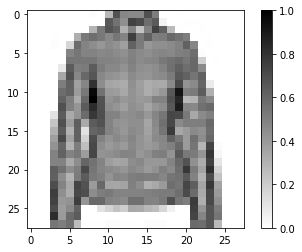

In [22]:
# Visualization

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

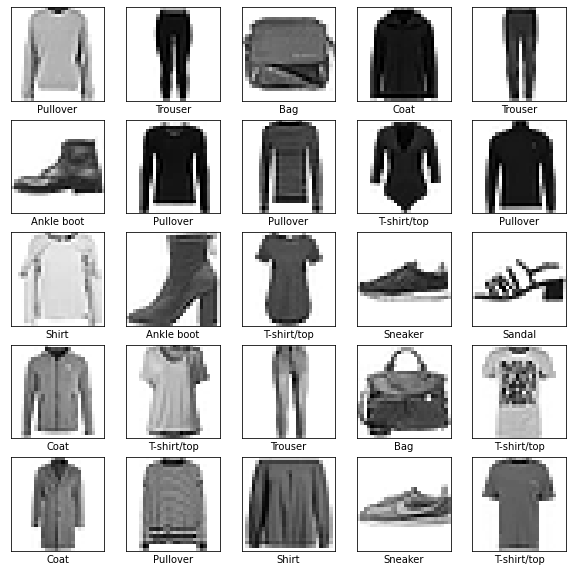

In [24]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_name[label])
plt.show()

In [25]:
# Build the model

model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        
    ]
)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    )

In [27]:
# Training step

BATCH_SIZE = 32

train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [28]:
model.fit(
    train_dataset,
    epochs=5,
    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE)
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4922 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3762 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3325 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8922


In [29]:
# Evaluation

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.8711
Accuracy on test dataset: 0.8711000084877014


In [30]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [31]:
predictions.shape

(32, 10)

In [32]:
predictions[0]

array([2.3287162e-04, 5.7778489e-06, 3.0499205e-02, 2.7963950e-04,
       8.8559479e-01, 6.4533999e-08, 8.3362930e-02, 6.6210582e-08,
       2.4603243e-05, 2.0503844e-08], dtype=float32)

In [33]:
np.argmax(predictions[0])

4

In [34]:
test_labels[0]

4

In [40]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

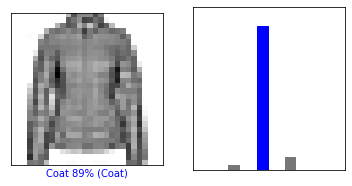

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

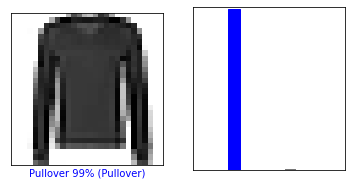

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

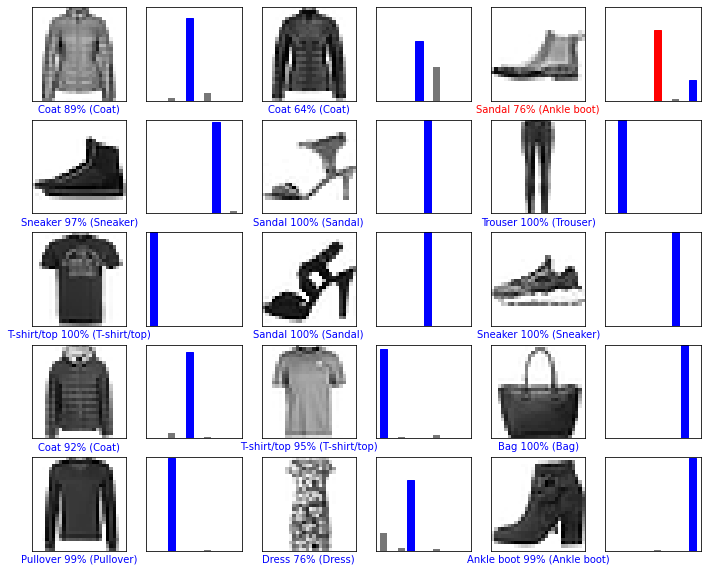

In [43]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [44]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [45]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.3287181e-04 5.7778584e-06 3.0499205e-02 2.7963970e-04 8.8559461e-01
  6.4534106e-08 8.3363123e-02 6.6210696e-08 2.4603283e-05 2.0503840e-08]]


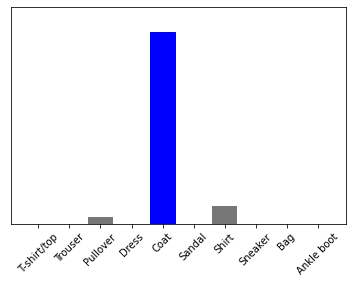

In [48]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

In [49]:
np.argmax(predictions_single[0])

4